**Gradient Descent **

Gradient descent is an optimization algorithm used in machine learning to minimize a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In simpler terms, it's like finding the lowest point in a hilly terrain by taking steps in the direction of the steepest slope downhill.

The main purpose of using gradient descent is to update the parameters of a model to minimize a cost function. In machine learning, models often have a cost function that measures the difference between predicted and actual values. The goal is to find the set of parameters that minimize this cost function, making the predictions as accurate as possible.

Gradient descent calculates the gradient of the cost function with respect to the model parameters. It then updates these parameters in the opposite direction of the gradient, taking steps proportional to the learning rate. This iterative process continues until it reaches a point where further changes to the parameters do not significantly decrease the cost function or until a predefined number of iterations is reached.

The algorithm is widely used because it's versatile, scalable, and applicable to various machine learning models. It's effective in finding optimal solutions in high-dimensional spaces and is foundational in training neural networks, linear regression, logistic regression, and many other models used in machine learning and deep learning.

In [3]:
import numpy as np  # Library for handling linear algebra functions
import pandas as pd  # Library for data processing using CSV files

# Libraries for data visualization
import seaborn as sns  # Statistical data visualization library
import matplotlib.pyplot as plt  # Library for creating visualizations
import matplotlib.patches as mpatches  # Library for drawing shapes and patches

# Imports from scikit-learn (sklearn) for various machine learning functionalities
from sklearn import preprocessing  # Data preprocessing methods from scikit-learn
from sklearn.preprocessing import StandardScaler  # Standardization method for scaling data
from sklearn.metrics import mean_squared_error  # Metric for measuring the mean squared error


In [4]:
#importing the dataset as a dataframe
df = pd.read_csv("/content/sample_data/IBMEmployeeAttrition.csv")

#Setting x and y
X = df.YearsAtCompany
y = df.YearsSinceLastPromotion

**Batch Gradient Descent**

Batch gradient descent is an optimization algorithm used to minimize a cost function by iteratively updating model parameters based on the gradient of the entire dataset. It calculates the gradient of the cost function for all training examples in the dataset to determine the direction in which the parameters should be updated.

In [5]:
# Creating the function for batch gradient descent
def batch_gradient_descent(X, y, learn_rate=0.05, epoch=10):
    m, b = 0.2, 0.2  # Initial parameters
    log, mse = [], []  # Lists to store learning progress
    N = len(X)  # Number of samples in the dataset

    for __ in range(epoch):
        # Calculate the predicted values
        f = y - (m * X + b)

        # Update parameters m and b using the gradients
        m -= learn_rate * (-2 * X.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)

        # Append updated parameters and mean squared error to lists
        log.append((m, b))
        mse.append(mean_squared_error(y, (m * X + b)))

    # Return the optimized parameters, a log of parameter updates, and the list of mean squared errors
    return m, b, log, mse


**The Application of a Batch Gradient Descent **


The application and evaluation of a batch gradient descent optimization method to fit a linear regression model involve an iterative process to find the optimal parameters that minimize the error between predicted and actual values. Batch gradient descent considers the entire dataset to update the model's parameters, adjusting them in the direction that minimizes the chosen cost function, often the mean squared error (MSE) in the case of linear regression. Through multiple iterations (epochs), this method fine-tunes the model parameters, such as slope and intercept in the case of linear regression, gradually reducing the error. The evaluation phase includes assessing the model's performance by calculating metrics like the MSE to gauge the goodness of fit between predicted and actual values. This approach helps in understanding how well the model generalizes to new data and visualizing the learning progress across epochs to ensure convergence and optimization of the model.

MSE: 6.415446172808255


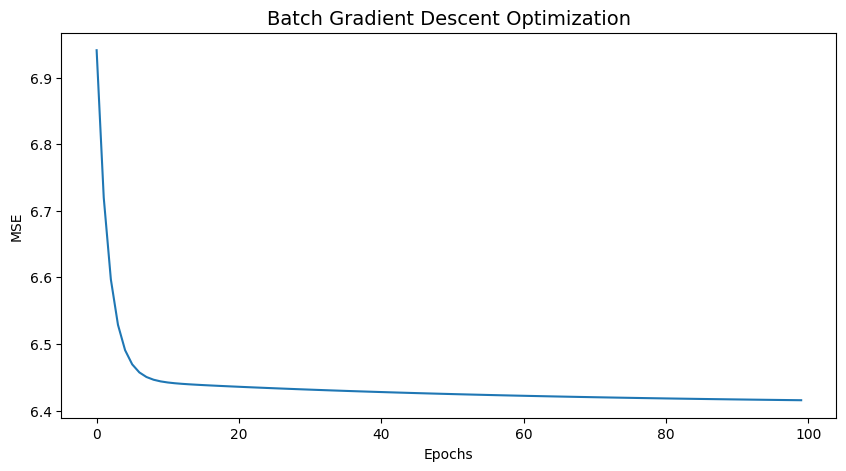

In [6]:
# Running the model using batch gradient descent
m, b, log, mse = batch_gradient_descent(X, y, learn_rate=0.01, epoch=100)

# Predicting y values using the optimized parameters
y_pred = m * X + b

# Calculating and displaying the mean squared error (MSE) of the model predictions
print("MSE:", mean_squared_error(y, y_pred))

# Graphing the MSE over epochs during optimization
plt.figure(figsize=(10, 5))
plt.plot(range(len(mse)), mse)
plt.title('Batch Gradient Descent Optimization', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()


**Stochastic Gradient Descent**

Stochastic Gradient Descent (SGD) is an optimization algorithm commonly used in machine learning for training models. Unlike batch gradient descent, which updates parameters using the entire dataset in each iteration, SGD updates the model's parameters using a single randomly chosen data point at each step. This randomness introduces noise, but it often converges faster, especially with large datasets, as each iteration requires less computational resources. SGD is highly effective in non-convex optimization problems and can escape local minima, but it tends to have noisier convergence due to its randomness. It's a fundamental algorithm in training neural networks and large-scale machine learning models, offering a trade-off between computation efficiency and convergence smoothness.







In [7]:
def stochastic_gradient_descent(X, y, learn_rate=0.05, epoch=10, batch_size=1):
    m, b = 0.5, 0.5  # Initial parameters
    log, mse = [], []  # Lists to store learning process

    for __ in range(epoch):
        indexes = np.random.randint(0, len(X), batch_size)  # Randomly select sample indexes

        # Retrieve random samples from X and y based on selected indexes
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)  # Number of samples in the batch

        f = ys - (m * Xs + b)  # Calculate the predicted values

        # Update parameters m and b using the gradients computed from the batch
        m -= learn_rate * (-2 * Xs.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)

        # Append updated parameters and mean squared error to lists
        log.append((m, b))
        mse.append(mean_squared_error(y, m * X + b))

    return m, b, log, mse


MSE: 9.09614218533703


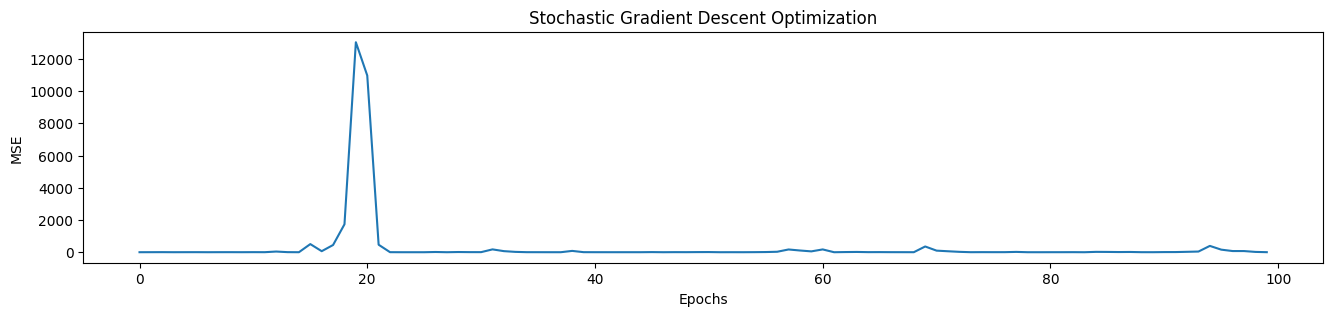

In [10]:
# Running the model using stochastic gradient descent
m, b, log, mse = stochastic_gradient_descent(X, y, learn_rate=0.01, epoch=100, batch_size=2)

# Predicting y values using optimized parameters
y_pred = m * X + b

# Calculating and displaying the Mean Squared Error (MSE) between predicted and actual y values
print("MSE:", mean_squared_error(y, y_pred))

# Graphing the results: Evolution of MSE over epochs during Stochastic Gradient Descent
plt.figure(figsize=(16, 3))  # Set the figure size for visualization

# Plotting the MSE values over epochs to observe optimization progress
plt.plot(range(len(mse)), mse)

# Setting the title and labels for the plot
plt.title('Stochastic Gradient Descent Optimization')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('MSE')  # Y-axis label

plt.show()  # Display the graph
